## Data Processing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/social_media_posts.csv')

In [3]:
df.head(10)

,caption_length,hashtags_count,time_of_day,post_type,shares,comments,likes,popular
0,122,0,afternoon,video,392,53,1280,1
1,455,18,night,image,323,160,1665,1
2,368,12,afternoon,text,34,177,967,0
3,290,12,afternoon,video,464,165,1994,1
4,126,3,night,image,481,154,1675,1
5,91,29,afternoon,text,215,14,866,0
6,208,0,afternoon,image,479,60,1360,1
7,40,16,morning,text,64,121,786,0
8,122,7,morning,video,7,20,500,0
9,141,1,night,image,300,45,890,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   caption_length  1000 non-null   int64 
 1   hashtags_count  1000 non-null   int64 
 2   time_of_day     1000 non-null   object
 3   post_type       1000 non-null   object
 4   shares          1000 non-null   int64 
 5   comments        1000 non-null   int64 
 6   likes           1000 non-null   int64 
 7   popular         1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

caption_length    0
hashtags_count    0
time_of_day       0
post_type         0
shares            0
comments          0
likes             0
popular           0
dtype: int64

In [8]:
df.describe()

,caption_length,hashtags_count,shares,comments,likes,popular
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,261.562000,14.494000,247.864000,100.725000,1288.747000,0.75700
std,136.467232,8.774221,145.504622,55.759344,370.588576,0.42911
min,20.000000,0.000000,0.000000,0.000000,239.000000,0.00000
25%,148.750000,7.000000,122.750000,56.000000,1005.500000,1.00000
50%,257.000000,14.000000,248.000000,100.000000,1289.000000,1.00000
75%,383.000000,22.000000,376.000000,149.000000,1548.500000,1.00000
max,499.000000,29.000000,499.000000,199.000000,2191.000000,1.00000


#### Feature distribution

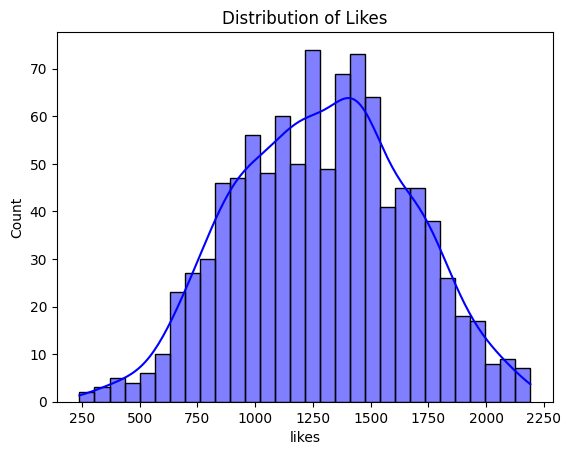

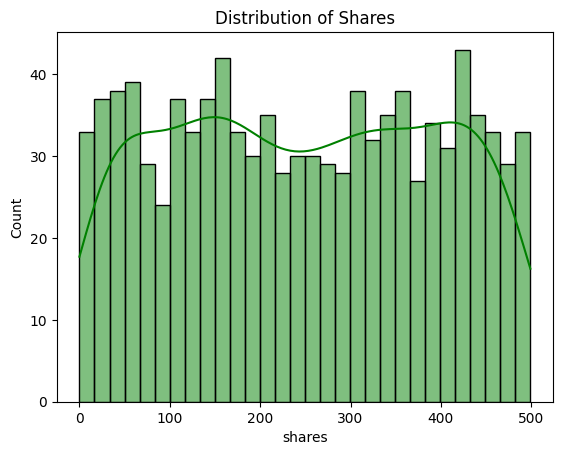

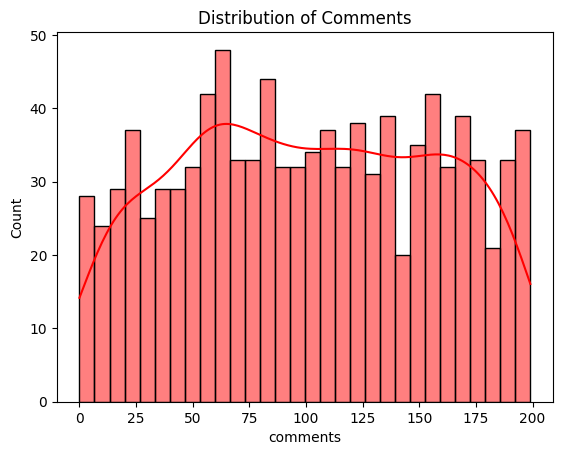

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True, color='blue', bins=30)
plt.title('Distribution of Likes')
plt.show()

sns.histplot(df['shares'], kde=True, color='green', bins=30)
plt.title('Distribution of Shares')
plt.show()

sns.histplot(df['comments'], kde=True, color='red', bins=30)
plt.title('Distribution of Comments')
plt.show()


#### Correlation Matrix

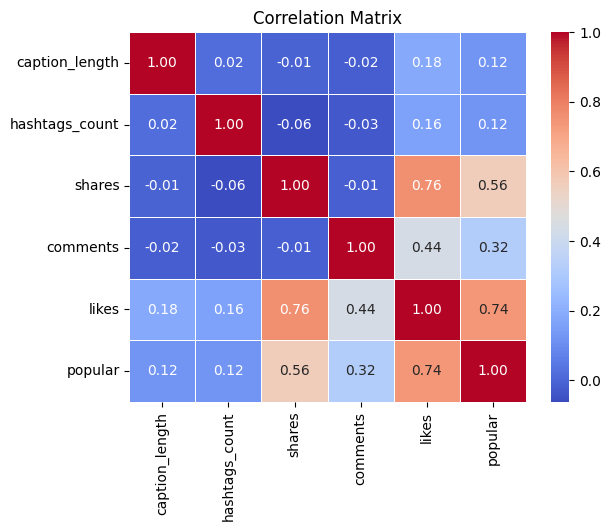

In [11]:
corr_matrix = df.corr(numeric_only=Tr)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\maigu\AppData\Local\Temp\ipykernel_22888\1935751095.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='popular', data=df, palette='Set2')


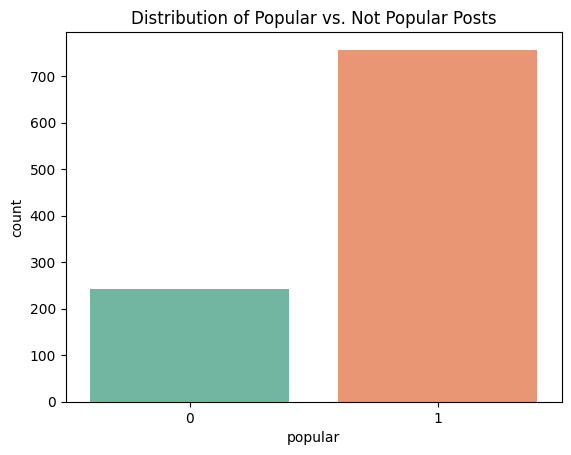

In [50]:
sns.countplot(x='popular', data=df, palette='Set2')
plt.title('Distribution of Popular vs. Not Popular Posts')
plt.savefig("POPvsNot.png")
plt.show()


The data is imbalanced, the gap between the popular post and the not popular posts is alot to be omitted

#### Balancing and Model creation

In [17]:
# !pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from imblearn.over_sampling import SMOTE

SMOTE works by creating synthetic examples rather than duplicating the minority class.   
It works by taking an instance of the minority class, finding its nearest neighbors,  
and then generating synthetic samples that are combinations of the original and the neighbors.  



In [23]:
X = df.drop('popular', axis=1)
y = df['popular']

In [25]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [26]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
y_pred = logreg.predict(X_test)

In [40]:
print("Accuracy score: ", accuracy_score(Y_test, y_pred))
print("\n Classification report \n", classification_report(Y_test, y_pred))

Accuracy score:  0.966996699669967

 Classification report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       152
           1       0.96      0.97      0.97       151

    accuracy                           0.97       303
   macro avg       0.97      0.97      0.97       303
weighted avg       0.97      0.97      0.97       303



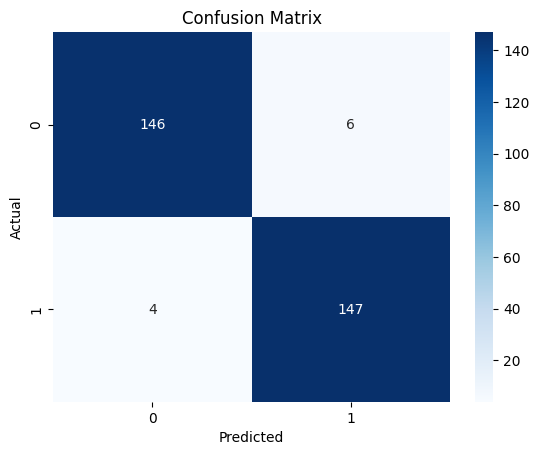

In [42]:
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("CMatrix.png")
plt.show()

Our Logistic Regression gives a wonderful accuracy of 96.7%, i am going to compare it with Random Forest to see which is higher

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
Yf_pred = rf.predict(X_test)

In [46]:
print("Accuracy: ", accuracy_score(Y_test, Yf_pred))
print("\nClassification report: \n", classification_report(Y_test, Yf_pred))

Accuracy:  1.0

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       151

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



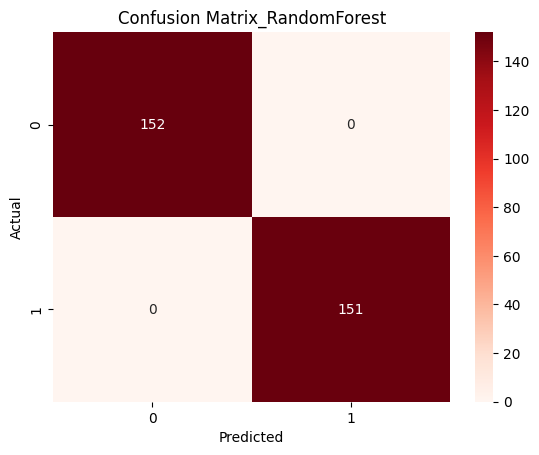

In [49]:
cm_rf = confusion_matrix(Y_test, Yf_pred)

sns.heatmap(cm_rf, annot=True, cmap="Reds", fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix_RandomForest")
plt.savefig("CMatrix2.png")
plt.show()

Random Forest can capture more complexity than simpler models.  
Synthetic data doesn't have as much noise, even though the creation of the dataset had some noise added, we can never fully mimic 
real world noise. Therefore, the structure made the classification easier.  
Getting a 100% accuracy seemed possible because it is not a real world data

In [51]:
import joblib

In [53]:
joblib.dump(logreg, "Model/LogisticRegression.pkl")
joblib.dump(rf, "Model/random_forest_classifier.pkl")

['Model/random_forest_classifier.pkl']